In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


# Stats

In [2]:
networks = get_networks()

In [3]:
networks

,label,old_category,source,category
1,DBLP,Coauthorship,Ley2002,social
2,HepPh,Cocitation,Leskovec2007,information
3,Enron,Communication,Klimt2004,social
4,FB-w,Social,Viswanath2009,social
5,Condm,Coauthorship,Lichtenwalter2010,social
6,HepTh,Cocitation,Leskovec2007,information
7,AMin,Coauthorship,Zhuang2013,social
8,FB-l,Social,Viswanath2009,social
9,D-rep,Communication,DeChoudhury2009,social
10,D-f,Social,Hogg2010,social


# Node temporal and static features

In [4]:
def logistic_regression_I_II(network_index: int, hypergraph: bool):
  # Start with static features
  X = {
    heuristic: np.load(
      f'data/{network_index:02}/features/time_agnostic/{heuristic}.npy')
    for heuristic in heuristics
  }
    
  # Add temporal node features
  aggregation_strategies = [
    'm0', 'm1', 'm2', 'm3', 'q0', 'q25', 'q50', 'q75', 'q100'] # Overwrite!
  
  for time_strategy in time_strategies: # Provided in constants.py
    for nodepair_strategy in nodepair_strategies: # Provided in constants.py
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
          X[(time_strategy, nodepair_strategy, aggregation_strategy)] = np.load(
            f'data/{network_index:02}/features/time_node/'
            f'{time_strategy}_{nodepair_strategy}_{aggregation_strategy}.npy'
          )
      else:
        X[(time_strategy, nodepair_strategy)] = np.load(
          f'data/{network_index:02}/features/time_node/'
          f'{time_strategy}_{nodepair_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_I_II = {
  network_index: (
    logistic_regression_I_II(
      network_index, hypergraph=network_index in hypergraph_indices
    )
  )
  for network_index in network_indices
}
auc_I_II

{1: 0.7863368130222413,
 2: 0.8678968872641256,
 3: 0.9086659447392743,
 4: 0.7876310735548301,
 5: 0.7277449748421873,
 6: 0.8191010910561745,
 7: 0.8164537020101426,
 8: 0.7754645567240421,
 9: 0.8652394984383198,
 10: 0.9237725794255673,
 11: 0.9389420566807009,
 12: 0.9018214701563307,
 13: 0.8734475157130799,
 14: 0.9327159510113384,
 16: 0.9374635890154469,
 18: 0.9402108424819104,
 19: 0.9378060495977154,
 20: 0.9393023587357804,
 21: 0.7363989181230394,
 22: 0.9698643314107537,
 23: 0.9611592775945083,
 24: 0.94589936,
 25: 0.9390019407454744,
 28: 0.889776849533702,
 29: 0.9246704244065782,
 30: 0.8490236683928805}

# Edge temporal features

In [5]:
def logistic_regression_III(network_index: int, hypergraph: bool):
  aggregation_strategies = [
    'm0', 'm1', 'q0', 'q25', 'q50', 'q75', 'q100'] # Overwrite of constants.py!
  
  X = dict()
  
  for heuristic in heuristics: # Provided in constants.py
    for time_strategy in time_strategies: # Provided in constants.py
      if hypergraph:
        for aggregation_strategy in aggregation_strategies:
            X[(heuristic, time_strategy, aggregation_strategy)] = np.load(
              f'data/{network_index:02}/features/time_edge/'
              f'{heuristic}_{time_strategy}_{aggregation_strategy}.npy')
      else:
        X[(heuristic, time_strategy)] = np.load(
          f'data/{network_index:02}/features/time_edge/'
          f'{heuristic}_{time_strategy}.npy')
    
  X = pd.DataFrame(X)
    
  y = np.load(f'data/{network_index:02}/targets_sampled.npy')
  
  X_train, X_test, y_train, y_test = (
    sklearn.model_selection.train_test_split(X, y))
  pipe = sklearn.pipeline.make_pipeline(
    sklearn.preprocessing.StandardScaler(),
    sklearn.linear_model.LogisticRegression(max_iter=10000))
  pipe.fit(X_train, y_train)
  
  auc = sklearn.metrics.roc_auc_score(
    y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1])
  
  return auc

auc_III = {
  network_index: logistic_regression_III(
    network_index, hypergraph=network_index in hypergraph_indices)
  for network_index in network_indices}
auc_III

{1: 0.8118709013939664,
 2: 0.8460323967488041,
 3: 0.8871447083929149,
 4: 0.7958511673361867,
 5: 0.7520505282021128,
 6: 0.8023427052531407,
 7: 0.8270550038368222,
 8: 0.7970258304200768,
 9: 0.8542345366775258,
 10: 0.9191301254480889,
 11: 0.9358839341429461,
 12: 0.8971839835494373,
 13: 0.7925426115340153,
 14: 0.9121884751404201,
 16: 0.9313957774927615,
 18: 0.9335322645105757,
 19: 0.9256417395302713,
 20: 0.9316781267125069,
 21: 0.7238938084254986,
 22: 0.9617686495836585,
 23: 0.9503435146017709,
 24: 0.8853552743420834,
 25: 0.8938438853650372,
 28: 0.8941197163487424,
 29: 0.9211201856522693,
 30: 0.855993411282331}

# Merge

In [9]:
x_label = 'auc (node activity + static features)'
y_label = 'auc (temporal edge features)'

df = pd.DataFrame({
  'category': networks['category'],
  x_label: pd.Series(auc_I_II),
  y_label: pd.Series(auc_III)
})
df
df.to_pickle('code/figures/temp.pkl')

In [7]:
df.corr()

,auc (node activity + static features),auc (temporal edge features)
auc (node activity + static features),1.000000,0.944384
auc (temporal edge features),0.944384,1.000000


# Figure

In [17]:
df.rename(columns={'category': 'Scientific domain'}, inplace=True)
df.replace({'Scientific domain': {'social': 'Social', 'information': 'Information', 'technological': 'Technological'}}, inplace=True)

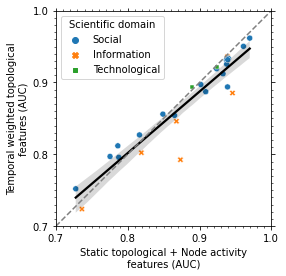

In [30]:
with plt.rc_context(rc):
  ax = sns.scatterplot(data=df, x=x_label, y=y_label, hue='Scientific domain', style='Scientific domain')
  sns.regplot(data=df, x=x_label, y=y_label, scatter=False, color='black', ax=ax)
  ax.axline((0,0), (1,1), ls='--', c='grey')
  ax.axis('scaled')
  ax.axis([.7, 1, .7, 1])
  ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
  ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
  ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
  ax.set_xlabel('Static topological + Node activity\nfeatures (AUC)')
  ax.set_ylabel('Temporal weighted topological\nfeatures (AUC)')
  plt.tight_layout()
  plt.savefig('code/figures/output/node-vs-edge.pdf')

In [31]:
df

,Scientific domain,auc (node activity + static features),auc (temporal edge features)
1,Social,0.786337,0.811871
2,Information,0.867897,0.846032
3,Social,0.908666,0.887145
4,Social,0.787631,0.795851
5,Social,0.727745,0.752051
6,Information,0.819101,0.802343
7,Social,0.816454,0.827055
8,Social,0.775465,0.797026
9,Social,0.865239,0.854235
10,Social,0.923773,0.919130
